In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/ironhack_careers.csv')
df.head()

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired
0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0
1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0
2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0
3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0
4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0


In [4]:
df.describe()

,id,saved,applied,inContact,interview,offer,hired
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,45287.954751,37.656109,27.171946,6.307692,3.488688,0.176471,0.565611
std,1371.467859,44.247335,40.200490,10.008423,5.084389,0.447811,0.514776
min,42735.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44232.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,45499.000000,23.000000,13.000000,3.000000,1.000000,0.000000,1.000000
75%,46488.000000,48.000000,34.000000,9.000000,5.000000,0.000000,1.000000
max,46987.000000,374.000000,367.000000,95.000000,28.000000,2.000000,2.000000


In [5]:
df.dtypes

id                  int64
full_name          object
email              object
cohort             object
curriculum         object
graduation_date    object
status             object
date_registered    object
saved               int64
applied             int64
inContact           int64
interview           int64
offer               int64
hired               int64
dtype: object

In [6]:
# strip columns (remove spaces)
for col in df.columns:
    if type(col) == object:
        df[col] = df[col].apply(lambda x : x.strip())
    else:
        continue

In [7]:
ux = df['curriculum'] == 'UXUI'
da = df['curriculum'] == 'Data Analytics'
wd = df['curriculum'] == 'Web Dev'
print(len(df))
print(len(df[ux]) + len(df[da]) + len(df[wd]))

221
216


In [8]:
df[df['curriculum'] == 'Cybersecurity']

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired
77,46357,André Almeida,andralmeida3@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Actively Seeking,2021-09-20,2,1,0,0,0,0
78,46356,João Gil,joaomiguelnunesgil@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Passively Seeking,2021-09-20,22,13,0,0,0,0
79,46353,Louise Altvater,louise.altvater@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,48,46,9,6,1,0
80,46351,Maria do Rosário Exposto,roexposto@gmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,37,34,5,5,0,0
81,46346,Francisco Campos,francisco.campos.b@hotmail.com,LIS-CSFT-Jun2021,Cybersecurity,2021-09-17,Hired,2021-09-20,118,118,27,16,1,0


In [9]:
df = df[df['curriculum'] != 'Cybersecurity']

In [10]:
print(len(df))
print(len(df[ux]) + len(df[da]) + len(df[wd]))

216
216


/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_19015/1080565995.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[ux]) + len(df[da]) + len(df[wd]))


In [11]:
print("Cohorts:", df.cohort.unique())
print("Curriculums", df.curriculum.unique())
print("Graduation dates:", df.graduation_date.unique())
print("Status:", df.status.unique())
print("Hired:", df.hired.unique())

Cohorts: ['LIS-UXUIFT-Oct2021' 'LIS-DATAFT-Oct2021' 'LIS-WDFT-Oct2021'
 'LIS-UXUIPT-Mar2021' 'LIS-WDFT-Aug2021' 'LIS-DATAPT-Mar2021'
 'LIS-UXUIFT-Aug2021' 'LIS-WDFT-May2021' 'LIS-DATAFT-May2021'
 'LIS-WDFT-Mar2021' 'LIS-DATAFT-Mar2021' 'LIS-UXUIFT-Mar2021'
 'LIS-WDPT-Oct2020' 'LIS-DATAPT-Oct2020' 'LIS-PTFEB-WEB'
 'LIS-DATAFTJan2021' 'LIS-WDFTJan2021' 'LIS-WDFT06' 'LIS-UXFT10'
 'LIS-WDFT10' 'LIS-DAFT10' 'LIS-DAFT06' 'LIS-PTFEB-DATA' 'LIS-UXUIFT04'
 'LIS-WDFT04']
Curriculums ['UXUI' 'Data Analytics' 'Web Dev']
Graduation dates: ['2021-12-17' '2021-10-22' '2021-10-08' '2021-10-23' '2021-07-30'
 '2021-05-21' '2021-05-08' '2020-07-31' '2021-03-12' '2020-08-31'
 '2020-12-11' '2020-06-15']
Status: ['Actively Seeking' 'Not Seeking' 'Hired' 'Passively Seeking'
 'Not seeking' 'Not Graduated']
Hired: [0 1 2]


In [12]:
df[df['status'] == 'Not seeking']['status'] = 'Not Seeking'
df.status.unique()

/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_19015/2446374422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['status'] == 'Not seeking']['status'] = 'Not Seeking'


array(['Actively Seeking', 'Not Seeking', 'Hired', 'Passively Seeking',
       'Not seeking', 'Not Graduated'], dtype=object)

In [13]:
df[df['hired'] == 2]['hired'] = 1

/var/folders/zw/4thxf2jn0h5cjn61m7hjsvr00000gp/T/ipykernel_19015/401468499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['hired'] == 2]['hired'] = 1


In [14]:
#df.head()
df.hired.unique()

array([0, 1, 2])

In [15]:
df['conv_applied_interview'] = df.apply(lambda x : x['interview']/x['applied'] if x['applied'] != 0 else 0, axis=1)
df['conv_interview_hired'] = df.apply(lambda x : x['hired']/x['interview'] if x['interview'] != 0 else 0, axis=1)


In [16]:
df['conv_applied_interview'].value_counts()

0.000000    85
0.333333     9
0.200000     7
0.500000     4
0.111111     4
            ..
0.119403     1
0.020134     1
0.051724     1
0.078431     1
0.529412     1
Name: conv_applied_interview, Length: 94, dtype: int64

In [17]:
df['conv_interview_hired'].value_counts()

0.000000    126
0.333333     15
1.000000     13
0.500000      9
0.250000      9
0.111111      7
0.166667      6
0.125000      5
0.200000      5
0.142857      3
0.100000      3
0.062500      3
0.047619      2
0.071429      2
0.055556      1
0.076923      1
0.045455      1
0.052632      1
0.153846      1
0.083333      1
0.066667      1
0.090909      1
Name: conv_interview_hired, dtype: int64

In [18]:
df

,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0,0.000000,0.000000
1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0,0.235294,0.000000
2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0,0.000000,0.000000
3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0,0.000000,0.000000
4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,42744,Susanne Aubert,susanneaubert@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,119,74,6,4,0,1,0.054054,0.250000
217,42743,Laissa Moura Ferreira,laissamf@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,67,12,1,15,0,1,1.250000,0.066667
218,42741,Cesar Mello,cesarpcj@hotmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,66,48,2,11,0,1,0.229167,0.090909
219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000


In [19]:
df.to_csv('data/ironhack_careers_clean.csv')

In [20]:
df.groupby(['curriculum', 'cohort']).agg({'id':'count'})
df.groupby(['curriculum', 'cohort']).agg({'applied':'mean', 'id':'count', 'interview' : 'mean'})
df.groupby(['curriculum', 'cohort', 'hired']).agg({'id':'count', 'hired':'count'})

id  hired
curriculum     cohort             hired           
Data Analytics LIS-DAFT06         0       1      1
                                  1       6      6
                                  2       1      1
               LIS-DAFT10         0       2      2
                                  1      10     10
               LIS-DATAFT-Mar2021 0       1      1
                                  1       3      3
               LIS-DATAFT-May2021 0       3      3
                                  1       1      1
                                  2       1      1
               LIS-DATAFT-Oct2021 0       7      7
                                  1       2      2
               LIS-DATAFTJan2021  0       1      1
                                  1       4      4
               LIS-DATAPT-Mar2021 0       3      3
                                  1       1      1
               LIS-DATAPT-Oct2020 0       4      4
                                  1       1      1
               LIS-PTFEB-DATA     0       1      1
                                  1       2      2
UXUI           LIS-UXFT10         0       2      2
                                  1      14     14
               LIS-UXUIFT-Aug2021 0       6      6
                                  1       8      8
               LIS-UXUIFT-Mar2021 0       3      3
                                  1       2      2
               LIS-UXUIFT-Oct2021 0      13     13
                                  1       1      1
               LIS-UXUIFT04       0       2      2
                                  1       7      7
               LIS-UXUIPT-Mar2021 0       7      7
Web Dev        LIS-PTFEB-WEB      0       3      3
                                  1       3      3
               LIS-WDFT-Aug2021   0       4      4
                                  1       8      8
               LIS-WDFT-Mar2021   0       6      6
                                  1       4      4
               LIS-WDFT-May2021   0       6      6
                                  1       3      3
               LIS-WDFT-Oct2021   0      11     11
                                  1       6      6
               LIS-WDFT04         0       2      2
                                  1       9      9
               LIS-WDFT06         0       1      1
                                  1       9      9
               LIS-WDFT10         0       1      1
                                  1      12     12
               LIS-WDFTJan2021    0       1      1
                                  1       3      3
               LIS-WDPT-Oct2020   0       2      2
                                  1       2      2

In [21]:
clean_data = pd.read_csv("data/ironhack_careers_clean.csv")
clean_data.head()

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
0,0,46987,Débora Peres Moreno de Souza,pmsdeb.ie@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-13,13,0,0,0,0,0,0.000000,0.0
1,1,46963,Fernando Rocha,fernando.rocha@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,35,34,9,8,1,0,0.235294,0.0
2,2,46961,Marta Cacabelos Martínez,marta.cacabelos.mtnez@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-12,0,0,0,0,0,0,0.000000,0.0
3,3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0,0.000000,0.0
4,4,46946,Milton Correa,miltoncorrea6@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.0


In [22]:
clean_data["graduation_date"]

0      2021-12-17
1      2021-12-17
2      2021-12-17
3      2021-12-17
4      2021-12-17
          ...    
211    2020-06-15
212    2020-06-15
213    2020-06-15
214    2020-06-15
215    2020-06-15
Name: graduation_date, Length: 216, dtype: object

In [23]:
clean_data["graduation_date"].unique()

array(['2021-12-17', '2021-10-22', '2021-10-08', '2021-10-23',
       '2021-07-30', '2021-05-21', '2021-05-08', '2020-07-31',
       '2021-03-12', '2020-08-31', '2020-12-11', '2020-06-15'],
      dtype=object)

In [24]:
clean_data["graduation_date"] = pd.to_datetime(clean_data["graduation_date"], format="%Y-%m-%d")
clean_data.sort_values("graduation_date", inplace=True)

In [25]:
clean_data

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111
214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000
196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,24,11,0,0,0,1,0.000000,0.000000
197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333
199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,0,0,0,0,0,0,0.000000,0.000000
24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,4,2,2,2,0,1,1.000000,0.500000
23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,35,35,0,0,0,0,0.000000,0.000000
32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,2,1,0,0,0,0,0.000000,0.000000


In [26]:
# students searching
condition1 = clean_data['status'] == 'Actively Seeking'
condition2 = clean_data['status'] == 'Passively Seeking'
len(clean_data[condition1 | condition2])

49

In [27]:
len(clean_data[clean_data['hired'] == 1])

121

In [28]:
conv_rate = clean_data.groupby(['curriculum', 'cohort', 'graduation_date']).agg({'conv_applied_interview': 'mean', 'conv_interview_hired': 'mean'})#lambda x : x.mean()/len(x)
conv_rate = conv_rate.sort_values(by='conv_applied_interview', ascending=False).reset_index()
conv_rate

,curriculum,cohort,graduation_date,conv_applied_interview,conv_interview_hired
0,UXUI,LIS-UXUIPT-Mar2021,2021-10-22,0.451967,0.000000
1,Web Dev,LIS-WDFT-May2021,2021-07-30,0.433654,0.134568
2,Web Dev,LIS-WDFT10,2020-12-11,0.391455,0.192155
3,Data Analytics,LIS-DATAFTJan2021,2021-03-12,0.372727,0.051111
4,Web Dev,LIS-WDFT04,2020-06-15,0.315267,0.231028
5,Web Dev,LIS-WDFT06,2020-08-31,0.271997,0.264291
6,Web Dev,LIS-PTFEB-WEB,2020-07-31,0.221162,0.081650
7,Web Dev,LIS-WDPT-Oct2020,2021-05-08,0.208333,0.025000
8,Data Analytics,LIS-DAFT06,2020-08-31,0.201975,0.154647
9,Web Dev,LIS-WDFT-Oct2021,2021-12-17,0.201809,0.058333


In [29]:
uxui = conv_rate[conv_rate.curriculum == 'UXUI'].sort_values(by='graduation_date')
uxui

,curriculum,cohort,graduation_date,conv_applied_interview,conv_interview_hired
10,UXUI,LIS-UXUIFT04,2020-06-15,0.188206,0.238889
19,UXUI,LIS-UXFT10,2020-12-11,0.110960,0.248512
24,UXUI,LIS-UXUIFT-Mar2021,2021-05-21,0.000000,0.000000
15,UXUI,LIS-UXUIFT-Aug2021,2021-10-08,0.144372,0.118452
0,UXUI,LIS-UXUIPT-Mar2021,2021-10-22,0.451967,0.000000
21,UXUI,LIS-UXUIFT-Oct2021,2021-12-17,0.065423,0.035714


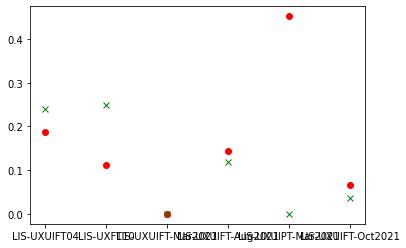

In [30]:
plt.plot(uxui['cohort'], uxui['conv_applied_interview'], 'ro')
plt.plot(uxui['cohort'], uxui['conv_interview_hired'], 'gx')
plt.show()

In [31]:
conv_rate2 = clean_data.groupby('curriculum').agg({'conv_interview_hired': 'mean'})
conv_rate2

,conv_interview_hired
curriculum,
Data Analytics,0.140319
UXUI,0.127454
Web Dev,0.145106


In [32]:
clean_data[clean_data['cohort'] == 'LIS-DAFT06'] 

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
172,177,43677,Melissa Badrudin,melissabadrudin93@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-20,24,21,3,3,0,1,0.142857,0.333333
183,188,43599,Rafael Barbosa Bandeira De Mello,rbmello@icloud.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,60,51,17,13,0,2,0.254902,0.153846
191,196,43500,João Inverno,j.inverno@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,31,20,1,4,1,1,0.200000,0.250000
189,194,43502,Diogo Merces,diogocarlos853@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,22,14,2,0,0,1,0.000000,0.000000
185,190,43596,Celina Agostinho,cfm.agostinho@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Passively Seeking,2020-09-01,77,62,5,7,0,0,0.112903,0.000000
184,189,43598,Joan Concha,jrenato.concha@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,32,22,13,6,0,1,0.272727,0.166667
188,193,43503,João Quintela,joaoquintela0@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,56,46,10,4,2,1,0.086957,0.250000
195,200,43495,Jorge Marques,jormarq1@hotmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,40,22,12,12,2,1,0.545455,0.083333


In [33]:
clean_data[clean_data['curriculum'] == 'Web Dev']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111
197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333
199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429
200,205,42828,Cristiane Koshino,cristianekoshino@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,26,16,0,1,0,1,0.062500,1.000000
201,206,42827,Fábio Guerreiro,ffsguerreiro@hotmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,41,7,0,3,0,1,0.428571,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21,46894,Raissa Damasceno,raissa.cod@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Actively Seeking,2021-12-21,5,2,1,1,0,0,0.500000,0.000000
30,30,46862,Ricardo Franco,ricardofranco14@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Actively Seeking,2021-12-20,9,9,5,1,0,0,0.111111,0.000000
28,28,46864,Anne Dantas,annedantas@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,30,29,8,6,1,1,0.206897,0.166667
27,27,46865,Yuri Farias,yurisfarias@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,0,0,0,0,0,1,0.000000,0.000000


In [34]:
clean_data[clean_data['curriculum'] == 'Data Analytics'].count()

Unnamed: 0                55
id                        55
full_name                 55
email                     55
cohort                    55
curriculum                55
graduation_date           55
status                    55
date_registered           55
saved                     55
applied                   55
inContact                 55
interview                 55
offer                     55
hired                     55
conv_applied_interview    55
conv_interview_hired      55
dtype: int64

In [35]:
clean_data[clean_data['cohort'] == 'LIS-UXUIPT-Mar2021']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired
19,19,46917,Diogo Monteiro,diogopmonteiro_@hotmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2022-01-10,0,0,0,0,0,0,0.000000,0.0
43,43,46774,Anaísa Faria,anaisagfaria@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,3,1,2,2,0,0,2.000000,0.0
44,44,46771,Dragana Martinovic,draganau17@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,29,24,4,1,0,0,0.041667,0.0
45,45,46769,Pedro del Rio,pedro@thedelrioux.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,185,182,2,2,1,0,0.010989,0.0
42,42,46775,Vanessa Lopes,vanessalopes.uxdesigner@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,15,2,3,0,0,0,0.000000,0.0
20,20,46909,Joana Louro,joanalouro@outlook.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2022-01-05,29,2,2,2,0,0,1.000000,0.0
46,46,46768,Andreia Caeiro,caeiro.andreia@gmail.com,LIS-UXUIPT-Mar2021,UXUI,2021-10-22,Actively Seeking,2021-12-13,13,9,2,1,0,0,0.111111,0.0


In [36]:
def format_pt_ft(row):
    if ('PT' in row['cohort']):
        return 'PT'
    else:
        return 'FT'

clean_data['format'] = clean_data.apply(format_pt_ft, axis=1)


In [37]:
clean_data

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format
215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111,FT
214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000,FT
196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,24,11,0,0,0,1,0.000000,0.000000,FT
197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333,FT
199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,0,0,0,0,0,0,0.000000,0.000000,FT
24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,4,2,2,2,0,1,1.000000,0.500000,FT
23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,35,35,0,0,0,0,0.000000,0.000000,FT
32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,2,1,0,0,0,0,0.000000,0.000000,FT


In [38]:
clean_data[clean_data['format'] == 'PT']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format
179,184,43611,Julia Carvalho,juliamendesc@gmail.com,LIS-PTFEB-WEB,Web Dev,2020-07-31,Not Seeking,2020-09-08,5,0,0,0,0,0,0.000000,0.000000,PT
178,183,43612,Matteo Verità,matteo.verita@outlook.com,LIS-PTFEB-DATA,Data Analytics,2020-07-31,Hired,2020-09-08,16,9,1,0,0,1,0.000000,0.000000,PT
177,182,43614,Vitor O Lopes,lopesvitor959@gmail.com,LIS-PTFEB-WEB,Web Dev,2020-07-31,Passively Seeking,2020-09-08,5,0,0,0,0,0,0.000000,0.000000,PT
176,181,43615,Rui Pereira,rui.miguel.pereira.rp@gmail.com,LIS-PTFEB-WEB,Web Dev,2020-07-31,Hired,2020-09-08,19,11,12,9,0,1,0.818182,0.111111,PT
175,180,43616,Diogo Sanches,diogosanches@live.com.pt,LIS-PTFEB-DATA,Data Analytics,2020-07-31,Hired,2020-09-08,14,3,0,1,0,1,0.333333,1.000000,PT
119,124,45476,Bruno Pais,bpais@outlook.pt,LIS-PTFEB-WEB,Web Dev,2020-07-31,Hired,2021-05-10,43,35,8,3,0,1,0.085714,0.333333,PT
173,178,43619,Filipe Morgado,filipesousamorgado@gmail.com,LIS-PTFEB-DATA,Data Analytics,2020-07-31,Not Seeking,2020-09-08,5,0,0,0,0,0,0.000000,0.000000,PT
171,176,43905,Yuri Jaen,yurimarkjaen@gmail.com,LIS-PTFEB-WEB,Web Dev,2020-07-31,Not Seeking,2020-10-19,58,5,5,0,0,0,0.000000,0.000000,PT
174,179,43618,Catarina Laranjeiro,ctlaranjeiro@gmail.com,LIS-PTFEB-WEB,Web Dev,2020-07-31,Hired,2020-09-08,59,52,28,22,1,1,0.423077,0.045455,PT
112,117,45484,David Morazzo,morazzo23@gmail.com,LIS-DATAPT-Oct2020,Data Analytics,2021-05-08,Not Seeking,2021-05-11,31,20,0,0,0,0,0.000000,0.000000,PT


In [39]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [40]:
c1 = clean_data['hired'] != 1
c2 = clean_data['hired'] != 0
clean_data[c1 & c2]

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format
183,188,43599,Rafael Barbosa Bandeira De Mello,rbmello@icloud.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,60,51,17,13,0,2,0.254902,0.153846,FT
90,95,46011,Felipe de Ávila Granja,felipe.avila.granja@gmail.com,LIS-DATAFT-May2021,Data Analytics,2021-07-30,Hired,2021-08-02,111,110,15,12,0,2,0.109091,0.166667,FT


In [41]:
clean_data['hired'] = clean_data['hired'].apply(lambda x: 1 if x == 2 else x)

In [42]:
clean_data[clean_data['cohort'] == 'LIS-DATAFT-Oct2021']

,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format
3,3,46956,Renato Filipe,renatofilipe1@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2022-01-11,5,0,0,0,0,0,0.000000,0.000000,FT
31,31,46855,Gladys Mawarni,gladysmawarni@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Hired,2021-12-20,3,3,0,0,0,1,0.000000,0.000000,FT
40,40,46794,Gonçalo Jardim,goncalodajardim@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-20,123,83,22,8,0,0,0.096386,0.000000,FT
37,37,46830,Isabelle van Hoorn,ivanhoorn@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-20,9,7,3,1,0,0,0.142857,0.000000,FT
36,36,46834,Luís Moreira,luisquintelamoreira@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-20,39,3,4,1,0,0,0.333333,0.000000,FT
35,35,46836,Stanley Rocha,stanleysrocha@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Hired,2021-12-20,86,85,16,9,1,1,0.105882,0.111111,FT
29,29,46863,Sidnei Andrade,sid.fe.a@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-20,5,3,0,0,0,0,0.000000,0.000000,FT
25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,0,0,0,0,0,0,0.000000,0.000000,FT
23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,35,35,0,0,0,0,0.000000,0.000000,FT


In [43]:
clean_data = clean_data.reset_index()

In [44]:
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111,FT
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000,FT
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,24,11,0,0,0,1,0.000000,0.000000,FT
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333,FT
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,0,0,0,0,0,0,0.000000,0.000000,FT
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,4,2,2,2,0,1,1.000000,0.500000,FT
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,35,35,0,0,0,0,0.000000,0.000000,FT
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,2,1,0,0,0,0,0.000000,0.000000,FT


In [45]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [46]:
clean_data['graduation_date'][0]

Timestamp('2020-06-15 00:00:00')

In [47]:
clean_data['year'] = clean_data['graduation_date'].dt.year

In [48]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [49]:
type(clean_data.graduation_date.min().date().year)

int

In [50]:
clean_data.head()

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,saved,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format,year
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,33,17,0,9,2,1,0.529412,0.111111,FT,2020
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,129,77,0,1,0,1,0.012987,1.000000,FT,2020
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,24,11,0,0,0,1,0.000000,0.000000,FT,2020
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,21,5,0,3,0,1,0.600000,0.333333,FT,2020
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,140,54,7,14,1,1,0.259259,0.071429,FT,2020


In [51]:
#clean_data.groupby(['curriculum', 'cohort', 'month']).agg({'conv_applied_interview': 'mean', 'conv_interview_hired': 'mean'}).reset_index()

In [52]:
clean_data['year'] = clean_data['year'].astype(str)

In [53]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [54]:
clean_data['month'] = clean_data['graduation_date'].dt.month

In [55]:
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,applied,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format,year,month
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,...,17,0,9,2,1,0.529412,0.111111,FT,2020,6
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,...,77,0,1,0,1,0.012987,1.000000,FT,2020,6
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,...,11,0,0,0,1,0.000000,0.000000,FT,2020,6
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,...,5,0,3,0,1,0.600000,0.333333,FT,2020,6
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,...,54,7,14,1,1,0.259259,0.071429,FT,2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,...,0,0,0,0,0,0.000000,0.000000,FT,2021,12
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,...,2,2,2,0,1,1.000000,0.500000,FT,2021,12
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,...,35,0,0,0,0,0.000000,0.000000,FT,2021,12
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,...,1,0,0,0,0,0.000000,0.000000,FT,2021,12


In [56]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [57]:
clean_data.groupby(['curriculum', 'month', 'year']).agg({'conv_applied_interview': 'mean', 'conv_interview_hired': 'mean'}).reset_index()

,curriculum,month,year,conv_applied_interview,conv_interview_hired
0,Data Analytics,3,2021,0.372727,0.051111
1,Data Analytics,5,2021,0.100939,0.203704
2,Data Analytics,7,2020,0.111111,0.333333
3,Data Analytics,7,2021,0.117608,0.083333
4,Data Analytics,8,2020,0.201975,0.154647
5,Data Analytics,10,2021,0.051587,0.125000
6,Data Analytics,12,2020,0.113190,0.196974
7,Data Analytics,12,2021,0.075384,0.012346
8,UXUI,5,2021,0.000000,0.000000
9,UXUI,6,2020,0.188206,0.238889


In [58]:
clean_data['month_year'] = clean_data['graduation_date'].apply(lambda x: str(x.month) + '-' + str(x.year))

In [59]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [60]:
clean_data.groupby(['curriculum', 'cohort', 'month', 'year']).agg({'conv_applied_interview': 'mean', 'conv_interview_hired': 'mean', 'index': 'count'}).reset_index()

,curriculum,cohort,month,year,conv_applied_interview,conv_interview_hired,index
0,Data Analytics,LIS-DAFT06,8,2020,0.201975,0.154647,8
1,Data Analytics,LIS-DAFT10,12,2020,0.113190,0.196974,12
2,Data Analytics,LIS-DATAFT-Mar2021,5,2021,0.046078,0.375000,4
3,Data Analytics,LIS-DATAFT-May2021,7,2021,0.117608,0.083333,5
4,Data Analytics,LIS-DATAFT-Oct2021,12,2021,0.075384,0.012346,9
5,Data Analytics,LIS-DATAFTJan2021,3,2021,0.372727,0.051111,5
6,Data Analytics,LIS-DATAPT-Mar2021,10,2021,0.051587,0.125000,4
7,Data Analytics,LIS-DATAPT-Oct2020,5,2021,0.144828,0.066667,5
8,Data Analytics,LIS-PTFEB-DATA,7,2020,0.111111,0.333333,3
9,UXUI,LIS-UXFT10,12,2020,0.110960,0.248512,16


In [61]:
clean_data[clean_data['cohort'] == 'LIS-DAFT06']

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,inContact,interview,offer,hired,conv_applied_interview,conv_interview_hired,format,year,month,month_year
29,172,177,43677,Melissa Badrudin,melissabadrudin93@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-20,...,3,3,0,1,0.142857,0.333333,FT,2020,8,8-2020
34,183,188,43599,Rafael Barbosa Bandeira De Mello,rbmello@icloud.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,17,13,0,1,0.254902,0.153846,FT,2020,8,8-2020
37,191,196,43500,João Inverno,j.inverno@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,1,4,1,1,0.200000,0.250000,FT,2020,8,8-2020
39,189,194,43502,Diogo Merces,diogocarlos853@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,2,0,0,1,0.000000,0.000000,FT,2020,8,8-2020
43,185,190,43596,Celina Agostinho,cfm.agostinho@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Passively Seeking,2020-09-01,...,5,7,0,0,0.112903,0.000000,FT,2020,8,8-2020
44,184,189,43598,Joan Concha,jrenato.concha@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,13,6,0,1,0.272727,0.166667,FT,2020,8,8-2020
45,188,193,43503,João Quintela,joaoquintela0@gmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,10,4,2,1,0.086957,0.250000,FT,2020,8,8-2020
46,195,200,43495,Jorge Marques,jormarq1@hotmail.com,LIS-DAFT06,Data Analytics,2020-08-31,Hired,2020-09-01,...,12,12,2,1,0.545455,0.083333,FT,2020,8,8-2020


In [62]:
clean_data.month_year.min()

'10-2021'

In [63]:
test =clean_data.groupby('curriculum').agg({'hired':'count'}).reset_index()

In [64]:
test.columns

Index(['curriculum', 'hired'], dtype='object')

In [65]:
hired = clean_data[clean_data['hired'] == 1]

In [66]:
hired.groupby('curriculum').agg({'hired': 'count'}).reset_index()

,curriculum,hired
0,Data Analytics,32
1,UXUI,32
2,Web Dev,59


In [67]:
hired2 = pd.DataFrame({
    "Curriculum": [h for h in hired.curriculum],
    "Count": [h for h in hired.hired]
})

In [68]:
hired = hired.groupby('curriculum').agg({'hired': 'count'}).reset_index()

In [69]:
hired.hired

0    32
1    32
2    59
Name: hired, dtype: int64

In [70]:

#        {'conv_applied_interview': 'mean'*100, 'conv_interview_hired': 'mean'*100, 'index': 'count'}).reset_index()
clean_data['conv_applied_interview_prcnt'] = clean_data['conv_applied_interview']*100
clean_data['conv_interview_hired_prcnt'] = clean_data['conv_interview_hired']*100

In [71]:
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,offer,hired,conv_applied_interview,conv_interview_hired,format,year,month,month_year,conv_applied_interview_prcnt,conv_interview_hired_prcnt
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,...,2,1,0.529412,0.111111,FT,2020,6,6-2020,52.941176,11.111111
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,...,0,1,0.012987,1.000000,FT,2020,6,6-2020,1.298701,100.000000
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,...,0,1,0.000000,0.000000,FT,2020,6,6-2020,0.000000,0.000000
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,...,0,1,0.600000,0.333333,FT,2020,6,6-2020,60.000000,33.333333
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,...,1,1,0.259259,0.071429,FT,2020,6,6-2020,25.925926,7.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,...,0,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,...,0,1,1.000000,0.500000,FT,2021,12,12-2021,100.000000,50.000000
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,...,0,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,...,0,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000


In [72]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [73]:
#clean_data.groupby(['curriculum', 'cohort', 'year', 'month', 'month_year']).agg(
#        {'conv_applied_interview_prcnt': 'mean', 'conv_interview_hired_prcnt': 'mean', 'index': 'count'}).sort_values(by='month_year', ascending=True).reset_index()

In [74]:
#clean_data["test_col"] = pd.to_
# (clean_data["graduation_date"], format="%Y-%m")
#clean_data.sort_values("graduation_date", inplace=True)

In [75]:
#clean_data[clean_data['graduation_date']=='2021-10-23T00:00:00.000000000']='2021-10-22T00:00:00.000000000'

In [76]:
#clean_data[clean_data['graduation_date']=='2021-10-22T00:00:00.000000000']

In [77]:
['2020','2021'].sort()

In [78]:
lista=['2022 - Q3','2022 - Q2','2021 - Q2', '2021 - Q1']
lista.sort()
lista

['2021 - Q1', '2021 - Q2', '2022 - Q2', '2022 - Q3']

In [79]:
def quarters(row):
    m, y = row['month_year'].split('-')
    m=int(m)
    if m<=3: 
        return y+' - Q1'
    elif 3<m<=6: 
        return y+' - Q2'
    elif 6<m<=9: 
        return y+' - Q3'
    elif 9<m: 
        return y+' - Q4'
        
    

In [80]:
clean_data['quarters']=clean_data.apply(quarters, axis=1)

In [81]:
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,hired,conv_applied_interview,conv_interview_hired,format,year,month,month_year,conv_applied_interview_prcnt,conv_interview_hired_prcnt,quarters
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,...,1,0.529412,0.111111,FT,2020,6,6-2020,52.941176,11.111111,2020 - Q2
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,...,1,0.012987,1.000000,FT,2020,6,6-2020,1.298701,100.000000,2020 - Q2
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,...,1,0.000000,0.000000,FT,2020,6,6-2020,0.000000,0.000000,2020 - Q2
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,...,1,0.600000,0.333333,FT,2020,6,6-2020,60.000000,33.333333,2020 - Q2
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,...,1,0.259259,0.071429,FT,2020,6,6-2020,25.925926,7.142857,2020 - Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,...,1,1.000000,0.500000,FT,2021,12,12-2021,100.000000,50.000000,2021 - Q4
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4


In [82]:
clean_data.to_csv('data/ironhack_careers_clean.csv')

In [83]:
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,hired,conv_applied_interview,conv_interview_hired,format,year,month,month_year,conv_applied_interview_prcnt,conv_interview_hired_prcnt,quarters
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,...,1,0.529412,0.111111,FT,2020,6,6-2020,52.941176,11.111111,2020 - Q2
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,...,1,0.012987,1.000000,FT,2020,6,6-2020,1.298701,100.000000,2020 - Q2
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,...,1,0.000000,0.000000,FT,2020,6,6-2020,0.000000,0.000000,2020 - Q2
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,...,1,0.600000,0.333333,FT,2020,6,6-2020,60.000000,33.333333,2020 - Q2
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,...,1,0.259259,0.071429,FT,2020,6,6-2020,25.925926,7.142857,2020 - Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,...,1,1.000000,0.500000,FT,2021,12,12-2021,100.000000,50.000000,2021 - Q4
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4


In [84]:
filtered = clean_data.groupby(['curriculum', 'cohort', 'graduation_date', 'month_year', 'quarters']).agg(
        {'conv_applied_interview_prcnt': 'mean', 'conv_interview_hired_prcnt': 'mean', 'index': 'count'}).sort_values(by='graduation_date', ascending=True).reset_index()

In [85]:
mask = ((filtered.curriculum == 'UXUI')
            & (filtered.quarters == '2020 - Q2'))

In [86]:
filtered_data = filtered.loc[mask, :]
filtered_data

,curriculum,cohort,graduation_date,month_year,quarters,conv_applied_interview_prcnt,conv_interview_hired_prcnt,index
1,UXUI,LIS-UXUIFT04,2020-06-15,6-2020,2020 - Q2,18.820585,23.888889,9


In [87]:
hired = clean_data[clean_data['hired'] == 1]
hired_filter = hired.groupby(['curriculum', 'graduation_date']).agg(
        {'hired': 'count'}).reset_index()
hired_filter

,curriculum,graduation_date,hired
0,Data Analytics,2020-07-31,2
1,Data Analytics,2020-08-31,7
2,Data Analytics,2020-12-11,10
3,Data Analytics,2021-03-12,4
4,Data Analytics,2021-05-08,1
5,Data Analytics,2021-05-21,3
6,Data Analytics,2021-07-30,2
7,Data Analytics,2021-10-23,1
8,Data Analytics,2021-12-17,2
9,UXUI,2020-06-15,7


In [88]:
#mask = ((filtered.curriculum == 'UXUI')
#            & (filtered.format == 'PT'))
#data.loc[mask, :]
clean_data

,index,Unnamed: 0,id,full_name,email,cohort,curriculum,graduation_date,status,date_registered,...,hired,conv_applied_interview,conv_interview_hired,format,year,month,month_year,conv_applied_interview_prcnt,conv_interview_hired_prcnt,quarters
0,215,220,42735,Ana Isabel de Almeida,ana.isabel190@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-26,...,1,0.529412,0.111111,FT,2020,6,6-2020,52.941176,11.111111,2020 - Q2
1,214,219,42740,Lucas Saldanha,lucassal16@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-05-26,...,1,0.012987,1.000000,FT,2020,6,6-2020,1.298701,100.000000,2020 - Q2
2,196,201,42986,Artur Serra,artur.aserra@gmail.com,LIS-UXUIFT04,UXUI,2020-06-15,Hired,2020-06-18,...,1,0.000000,0.000000,FT,2020,6,6-2020,0.000000,0.000000,2020 - Q2
3,197,202,42959,Vasco Matos,vascomato@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-06-09,...,1,0.600000,0.333333,FT,2020,6,6-2020,60.000000,33.333333,2020 - Q2
4,199,204,42836,Ricardo Sacardo,rperezsacardo@gmail.com,LIS-WDFT04,Web Dev,2020-06-15,Hired,2020-05-28,...,1,0.259259,0.071429,FT,2020,6,6-2020,25.925926,7.142857,2020 - Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,25,46872,Filipe Costa,fa.pc1995@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Passively Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
212,24,24,46875,Clara Vasconcelos,claraeclara@gmail.com,LIS-WDFT-Oct2021,Web Dev,2021-12-17,Hired,2021-12-20,...,1,1.000000,0.500000,FT,2021,12,12-2021,100.000000,50.000000,2021 - Q4
213,23,23,46891,Filipe Gardete,fgardete@gmail.com,LIS-DATAFT-Oct2021,Data Analytics,2021-12-17,Actively Seeking,2021-12-21,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4
214,32,32,46853,Thomas Schnabel,thomas.schnabel@gmail.com,LIS-UXUIFT-Oct2021,UXUI,2021-12-17,Not Seeking,2021-12-20,...,0,0.000000,0.000000,FT,2021,12,12-2021,0.000000,0.000000,2021 - Q4


In [90]:
clean_data.to_csv('data/newcsv.csv')

In [ ]:
filtered = clean_data.groupby(['curriculum', 'cohort', 'format', 'graduation_date', 'month_year']).agg(
        {'conv_applied_interview_prcnt': 'mean', 'conv_interview_hired_prcnt': 'mean', 'id': 'count'}).sort_values(by='graduation_date', ascending=True).reset_index()
curr_mask = ((clean_data.curriculum == 'Data Analytics'))
filtered = filtered.loc[curr_mask, :]
